In [1]:
from pycaret.datasets import *

In [8]:
dataset = get_data('automobile')
dataset.shape

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


(202, 26)

In [9]:
data_train = dataset.sample(frac=0.9, random_state=47)
data_train.shape

(182, 26)

In [10]:
data_test = dataset.drop(data_train.index)
data_test.shape

(20, 26)

In [11]:
data_train.reset_index(drop=True, inplace=True)
data_train.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
1,0,91.0,toyota,gas,std,four,hatchback,fwd,front,95.7,166.3,64.4,52.8,2122,ohc,four,98,2bbl,3.19,3.03,9.0,70,4800,28,34,8358
2,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
3,0,108.0,nissan,gas,std,four,wagon,fwd,front,100.4,184.6,66.5,56.1,3296,ohcv,six,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399
4,0,NaN,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,180.2,66.9,55.1,2579,ohc,four,97,idi,3.01,3.4,23.0,68,4500,33,38,13845


In [12]:
data_test.reset_index(drop=True, inplace=True)
data_test.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
1,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
2,1,148.0,dodge,gas,std,four,hatchback,fwd,front,93.7,157.3,63.8,50.6,1967,ohc,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6229
3,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1945,ohc,four,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6695
4,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,?,?,9.4,135,6000,16,23,15645


In [13]:
from pycaret.regression import *

In [17]:
env_m = setup(data=data_train, target='price', session_id=123)

,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(182, 26)"
3,Missing Values,True
4,Numeric Features,10
5,Categorical Features,15
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(127, 149)"


# Model Training

In [20]:
best_specific = compare_models(include = ['lr', 'dt','rf','lightgbm', 'ada'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1695,7.136e+06,2526,0.7906,0.1562,0.1226,0.356
ada,AdaBoost Regressor,1999,8.505e+06,2770,0.748,0.1936,0.1669,0.085
dt,Decision Tree Regressor,2011,8.727e+06,2831,0.6833,0.1944,0.1496,0.017
lightgbm,Light Gradient Boosting Machine,2504,1.543e+07,3685,0.5511,0.2232,0.1785,0.29
lr,Linear Regression,3054,2.617e+07,4839,-0.2748,0.3803,0.2615,0.702


In [21]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2159,1.088e+07,3298,0.8913,0.1425,0.1072
1,1740,6.064e+06,2463,0.6218,0.1797,0.1303
2,1644,1.195e+07,3457,0.8933,0.162,0.1188
3,1231,3.476e+06,1864,0.8036,0.1359,0.1011
4,1840,7.443e+06,2728,0.8907,0.1275,0.0976
5,1326,3.099e+06,1760,0.9521,0.1089,0.0941
6,2325,8.916e+06,2986,0.6923,0.2256,0.1973
7,1180,1.864e+06,1365,0.5968,0.1308,0.1191
8,964.9,1.837e+06,1355,0.8589,0.1389,0.1099
9,2538,1.584e+07,3979,0.7056,0.2107,0.1508


# Tune model

In [22]:
tuned_rf = tune_model(rf, search_library='scikit-optimize', fold=8)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2054,1.018e+07,3190,0.8897,0.1459,0.1135
1,1432,4.006e+06,2001,0.9243,0.1533,0.1116
2,1924,1.266e+07,3557,0.7785,0.1712,0.135
3,1341,5.344e+06,2312,0.9181,0.1342,0.0959
4,1502,4.138e+06,2034,0.9264,0.1304,0.1002
5,1715,6.103e+06,2470,0.7479,0.192,0.1587
6,1436,3.159e+06,1777,0.6566,0.1683,0.1497
7,2164,1.431e+07,3783,0.6866,0.1977,0.1294
Mean,1696,7.487e+06,2641,0.816,0.1616,0.1243
SD,295.9,4.017e+06,716.5,0.1049,0.0235,0.0213


# Plot model

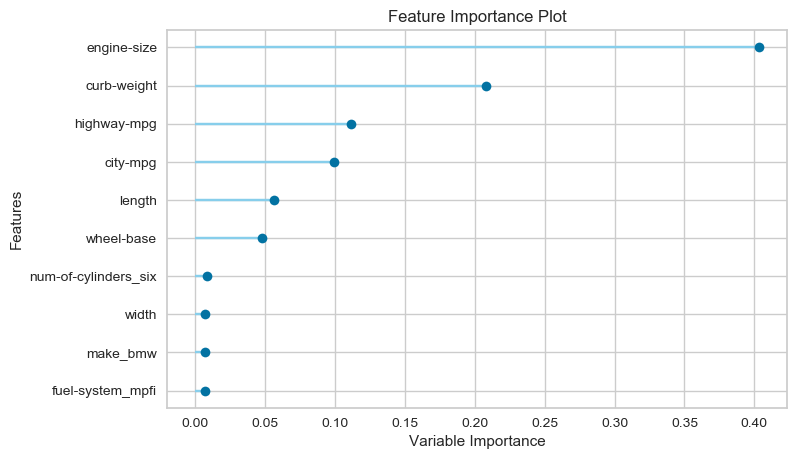

In [23]:
plot_model(tuned_rf, plot='feature')

# Interpret Model

Interpreting complex models are of fundamental importance in machine learning. Model Interpretability helps debug the model by analyzing what the model really thinks is important. Interpreting models in PyCaret is as simple as writing interpret_model. The function takes trained model object and type of plot as string. Interpretations are implemented based on the SHAP (SHapley Additive exPlanations) and is only available for **tree-based models**.

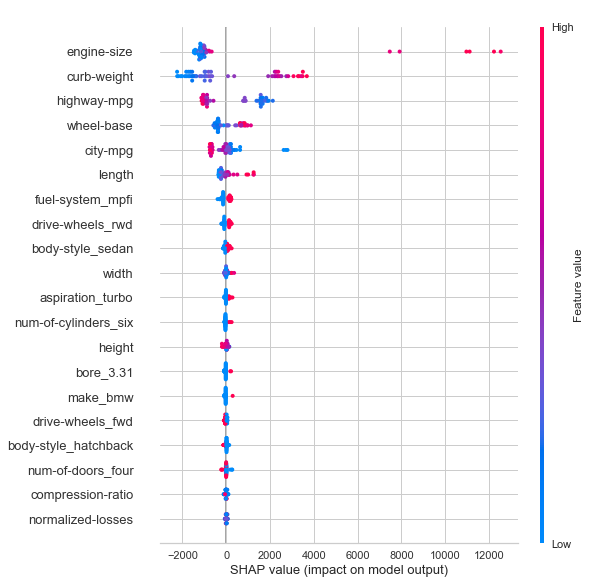

In [26]:
interpret_model(tuned_rf)

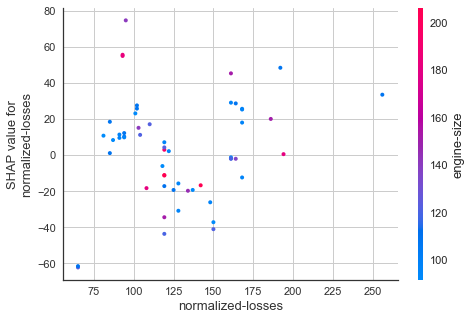

In [27]:
interpret_model(tuned_rf, plot = 'correlation')

In [28]:
interpret_model(tuned_rf, plot = 'reason', observation = 10)

# Predict Model

In [29]:
pred_model = predict_model(tuned_rf)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,1701,5.491e+06,2343,0.9163,0.1622,0.1311


In [31]:
pred_model = predict_model(tuned_rf, data=data_test)

pred_model.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,Label
0,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.4,8.5,110,5500,19,25,18920,17562.053995
1,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.4,8.3,140,5500,17,20,23875,18563.617194
2,1,148.0,dodge,gas,std,four,hatchback,fwd,front,93.7,...,2bbl,2.97,3.23,9.4,68,5500,31,38,6229,6417.418368
3,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,2bbl,3.03,3.15,9.0,68,5000,31,38,6695,6980.255944
4,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,mpfi,?,?,9.4,135,6000,16,23,15645,14998.941339


In [ ]:
save_model(tuned_rf)